 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 8. Auto Encoder**
# Section 2. Principal Component Analysis (1) Basis

### _Objective_
1. 가장 기본적인 차원축소방법인 Principal Component Analysis에 대해 배워보도록 하겠습니다. <br>
  
╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline

import tensorflow as tf
import math
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

import pandas as pd

## 예제 데이터 ) IRIS 데이터 셋

IRIS 데이터셋은 붓꽃에 대한 정보를 가진 데이터로, 총 4개의 Feature로 이루어져 있습니다.<br>
이 4개의 Feature는 서로 강한 상관관계를 가지고 있습니다.

In [0]:
iris_dataset = datasets.load_iris()

data = iris_dataset.data
target = iris_dataset.target

In [4]:
df = pd.DataFrame(data,columns=iris_dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

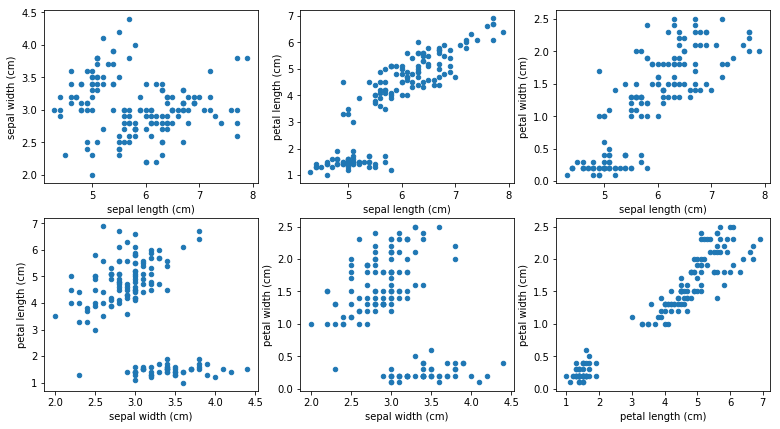

In [6]:
fig = plt.figure(figsize=(13,7))

c = 1
for idx, x_col in enumerate(df.columns):
    for y_col in df.columns[idx+1:]:
        ax = fig.add_subplot(2, 3, c)
        c+=1
        df.plot(x=x_col,
                y=y_col,
                ax=ax,
                kind='scatter')
plt.show()        

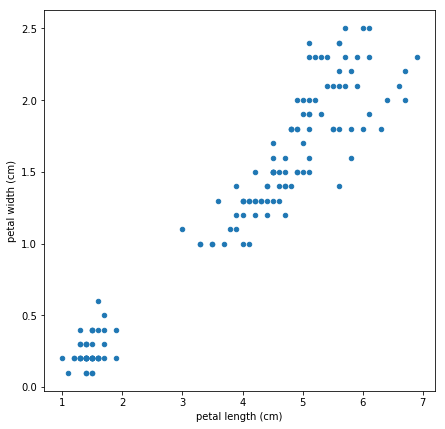

In [7]:
df.plot(x='petal length (cm)',
        y='petal width (cm)',
        kind='scatter',
        figsize=(7,7))
plt.show()

<br><br>

# \[ 1. Principal Component Anaylsis의 기본 원리 \]

----

----

> *PCA은 M개의 특징들을 독립적인 N개의 주성분들로 나누어 표현하는 방법입니다.*<br>
*이 때 주성분은 분산이 큰 방향을 기준으로 결정됩니다. 분산이 클수록, 보다 많은 정보를 가지고 있기 때문입니다.*<br>


<br>
## 1. 알고리즘 순서
---

알고리즘 순서는 아래와 같습니다.

1. 특징 정보에 대한 공분산 행렬을 구합니다.(Covariance Matrix)
   * $COV(X) = \frac{1}{n-1} X^TX$

2. 공분산 행렬에서 고유값분해를 수행합니다. 
   이를 통해, 우리는 공분산을 기준으로, M개의 독립적인 축을 구할 수 있습니다.
   * $Xu = \lambda u$
3. 독립적인 M개의 축 중에서, 분산이 큰 순서대로 K개의 축(principal Component)를 추출합니다. (EigenValue)
   * $W_d = 
\begin{bmatrix}
\vdots & \vdots & \vdots &  & \vdots \\
PC_1    & PC_2    & PC_3    & \cdots & PC_k \\
\vdots & \vdots & \vdots &  & \vdots\\
\end{bmatrix}
$
4. 위의 PC로 mapping Matrix를 구해서, 원래 이미지에 적용합니다.
   * $X_{d-proj} = X \cdot W_d$

<br>
## 2. 공분산이란?
---


2 개의 확률 변수 X와 Y에 대한 공분산은 아래와 같습니다.<br>
$
cov(X,Y) = \frac{\sum^{n}_{i=1} (X_i-\bar X)(Y_i-\bar X)}{n-1}\\
= E[XY]-\bar Y E[X] - \bar X E[Y] + \bar X \bar Y \\
= E[XY]-\bar Y \bar X - \bar X \bar Y + \bar X \bar Y\\
= E[XY] - \bar X \bar Y
$<br>
일반적으로 공분산을 구할 때, 수식의 간결성을 위해<br>
확률 변수의 기댓값을 0으로 맞춰줍니다. <br>
확률 변수의 기댓값($\bar X,\bar Y$)을 0이라 하고 수식을 전개하면<br>
$
= E[XY] \\
= \frac{1}{n-1} X^T \cdot Y
$<br>
위와 같이 두 확률 변수의 행렬곱의 평균으로 나오게 됩니다.<br>

공분산은 두 확률 변수 간 상관 관계를 알려줍니다. 이 값의 크기와 부호에 따라<br>
두 변수가 어떤 관계인지 알 수 있습니다.

### (1) 양의 선형 관계일 때의 공분산

공분산 : 3.500


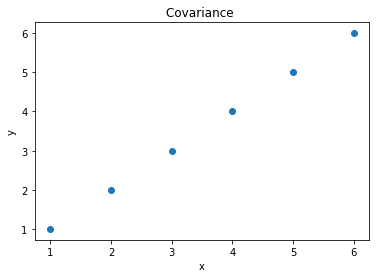

In [8]:
X = np.array([1,2,3,4,5,6])
Y = np.array([1,2,3,4,5,6])


# numpy 을 이용해 공분산을 구합니다. 
norm_X = #fix me# 
norm_Y = #fix me# 

cov_XY = #fix me# 
print("공분산 : {:2.3f}".format(#fix me# ))

plt.title("Covariance ")
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### (2) 서로 관계 없었을 때의 공분산

공분산 : 0.000


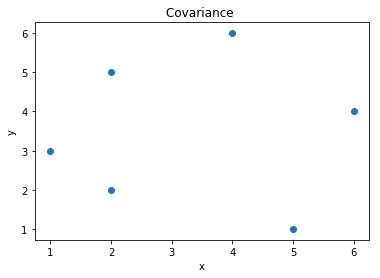

In [9]:
X = np.array([5,2,1,6,2,4])
Y = np.array([1,2,3,4,5,6])

norm_X = #fix me# 
norm_Y = #fix me#

cov_XY = #fix me#
print("공분산 : {:2.3f}".format(#fix me#))

plt.title("Covariance ")
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<br>
## 3. 고유값과 고유벡터
---


* 고유값과 고유벡터의 정의는 아래와 같습니다.<br>

   > 정방 행렬 A의 고유벡터($\upsilon$)와 고유값($\lambda$)는 아래의 조건을 만족합니다.<br>
$$
A\upsilon = \lambda \upsilon
$$

* 어떤 벡터를 행렬에 곱한 결과로 나타난 벡터가 원래의 벡터와 같은 방향을 향하고 있다면, 이를 **고유벡터**라 하고, 그 때 달라진 비율을 **고유값**이라고 합니다. <br>

<br>
## 4. 고유 벡터와 기저벡터
---
* 고유 벡터는 해당 행렬의 기저(basis) 벡터로서 동작합니다.<br>
* 하나의 행렬을 고유값과 고유벡터로 나누는 것은 행렬을 독립적인 M개의 축(기저벡터)로 나누는 것과 동일합니다. 

* 공분산 행렬에 고유값과 고유벡터를 구하게 되면,<br>
우리는 공분산의 크기(고유값)에 따라, 정렬된 방향(고유벡터)를 얻을 수 있게 됩니다.

<br><br>

# \[ 2. Numpy를 이용하여 PCA 구현하기 \]

----

----

> *Numpy를 통해 우리는 PCA를 구현할 수 있습니다.* <br>
> *이중 고유값분해는 알고리즘으로 매우 중요한 이슈이지만, 이 수업의 범위를 넘어서기 때문에 구체적으로 다루지 않겠습니다.*

<br>
## 1. 공분산 행렬 구하기 
----

데이터는 각각 d개의 특징을 가진, 총 N개의 케이스로 구성됩니다.<br>
현재 IRIS 데이터셋에서는 N=150, d=4개입니다.<br>
$
X = \begin{bmatrix}
\vdots & \vdots & \vdots &  & \vdots \\
X_1    & X_2    & X_3    & \cdots & X_d \\
\vdots & \vdots & \vdots &  & \vdots
\end{bmatrix}
$<br>

위와 같은 데이터셋의 공분산은 아래와 같이 구할 수 있습니다.<br>
공분산 행렬을 구하기 전, X는 각 열의 평균값을 빼주어야 합니다.

$
COV(X) = \frac{1}{n-1} X^TX \\
= \frac{1}{n-1} \begin{bmatrix}
\cdots & X_1    & \cdots & \cdots  \\
\cdots & X_2    & \cdots & \cdots \\
       & \cdots &        &  \\
\cdots & X_d & \cdots & \cdots 
\end{bmatrix} \cdot \begin{bmatrix}
\vdots & \vdots & \vdots &  & \vdots \\
X_1    & X_2    & X_3    & \cdots & X_d \\
\vdots & \vdots & \vdots &  & \vdots
\end{bmatrix}
= \frac{1}{n-1} \begin{bmatrix}
X_1\cdot X_1 & X_1\cdot X_2 & \cdots & X_1\cdot X_d \\
X_2\cdot X_1 & X_2\cdot X_2 & \cdots & X_2\cdot X_d \\
\vdots & \vdots  & \cdots & \vdots \\
X_d\cdot X_1 & X_d\cdot X_2 & \cdots & X_d\cdot X_d \\
\end{bmatrix}
= \begin{bmatrix}
cov(X_1,X_1) & cov(X_1,X_2) & \cdots & cov(X_1,X_d) \\
cov(X_2,X_1) & cov(X_2,X_2) & \cdots & cov(X_2,X_d) \\
\vdots & \vdots  & \cdots & \vdots \\
cov(X_d,X_1) & cov(X_d,X_2) & \cdots & cov(X_d,X_d) \\
\end{bmatrix}
$

공분산 행렬의 각 원소들은 각 특징 간 **공분산** 정도를 나타나게 됩니다.<br>

In [10]:
# Covariance Matrix 구하기 위해 아래와 같은 작업을 수행합니다.
# 1. normalization 
# 2. (X.T * X )/ n-1 


array([[ 6.38252039, -1.01751619,  1.97718884, -4.9083474 ],
       [-1.01751619,  0.35687676, -0.44996183,  0.80685092],
       [ 1.97718884, -0.44996183,  3.20299824,  0.62632106],
       [-4.9083474 ,  0.80685092,  0.62632106,  5.7464224 ]])

In [35]:
# numpy에서는 covariance Matrix를 바로 구할 수 있도록 메소드를 지원합니다.
# np.cov 을 사용합니다.

array([[4.75      , 4.42166667, 4.35333333, ..., 2.915     , 2.475     ,
        2.6       ],
       [4.42166667, 4.14916667, 4.055     , ..., 2.95583333, 2.50416667,
        2.62833333],
       [4.35333333, 4.055     , 3.99      , ..., 2.68833333, 2.28166667,
        2.39666667],
       ...,
       [2.915     , 2.95583333, 2.68833333, ..., 4.18916667, 3.65083333,
        3.835     ],
       [2.475     , 2.50416667, 2.28166667, ..., 3.65083333, 3.20916667,
        3.375     ],
       [2.6       , 2.62833333, 2.39666667, ..., 3.835     , 3.375     ,
        3.55      ]])

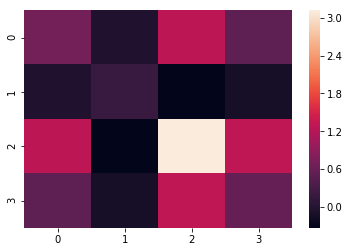

In [12]:
# 시각화 합니다.
sns.heatmap(cov_x)

<br>
## 2. 고유값 분해
----

고유값 분해는 LU 분해, QR 분해법 등 다양한 알고리즘이 존재합니다<br>
이러한 내용들은 중요하나, 이번 강의에서의 범위를 벗어나 다루지 않습니다.<br>
텐서플로우나 넘파이와 같은 수치연산 프레임워크에서는 보통 제공합니다.

In [13]:
eigen_value, eigen_vector = #fix me# 
eigen_value

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

eigen_vector는 eigen_value에 따라 정렬된 상태입니다.<br>
첫번째 열 벡터가 가장 분산이 큰 주성분 방향 벡터가 됩니다.<br>

In [14]:
eigen_vector

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

<br>
## 3. D차원으로 투영하기
----

가장 분산이 큰 d개의 주 성분으로 정의한 평면에 데이터를 투영하여 데이터의 차원을 <br>
D차원으로 축소시킬 수 있습니다.<br>
$
X_{proj} = X \cdot W_d
$

[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]


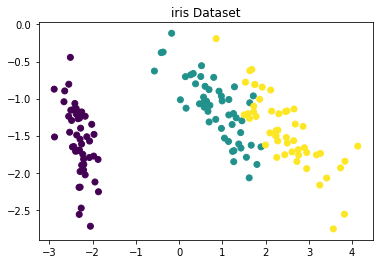

array([[ 1.6355,  1.4355,  1.2355,  1.1355,  1.5355],
       [ 0.0355, -0.4645, -0.2645, -0.3645,  0.1355],
       [-2.0645, -2.0645, -2.1645, -1.9645, -2.0645],
       [-3.2645, -3.2645, -3.2645, -3.2645, -3.2645]])

In [33]:
# 2개의 주성분을 가져옵니다.
W2 = eigen_vector[:, :#fix me#] 

# Eigen vector 에 x 데이터를 projection 합니다.                  
X_proj = #fix me # 
                  
# projection 된 vector 을 시각화 합니다.
plt.title("iris Dataset")
plt.scatter(X_proj[:,0],X_proj[:,1],c=target)
plt.show()
norm_x.T[:, :5]

우리는 4차원의 데이터를 2차원의 공간에 투영시켰습니다. <br>
이와 같은 방식으로 4차원의 데이터를 3차원의 공간에 투영시키면 아래와 같습니다.<br>

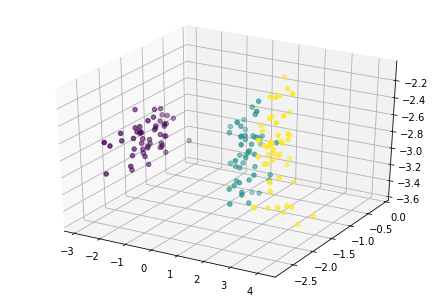

In [0]:
# 3개의 주성분만 가져옴
W3 = eigen_vector[:,:3] 

# Eigen vector 에 x 데이터를 projection 합니다.
X_proj = np.matmul(norm_x, W3)

# projection 된 vector 을 3차원에 plot 합니다.
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_proj[:,0],
           X_proj[:,1],
           X_proj[:,2],
           c=target)
plt.show()

<br>
## 4. 분산의 비율
---

PCA에서 분산은 일종의 정보량(information)의 개념입니다.<br>
PCA를 통해, 얼마나 분산이 보존되었는가에 따라<br>
얼마나 원본의 정보를 담고 있는지를 알 수 있습니다.

[4.22824171 0.24267075 0.0782095  0.02383509]
[0.92461872 0.97768521 0.99478782 1.        ]


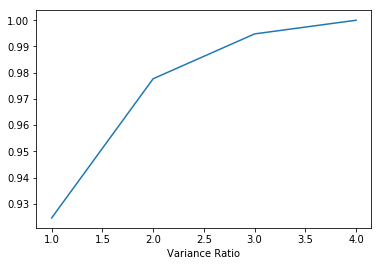

In [38]:
cumsum = np.cumsum(eigen_value)/np.sum(eigen_value)
plt.plot([1,2,3,4],cumsum)
plt.xlabel("the number of Principal Component")
plt.xlabel("Variance Ratio")
plt.show()

<br>
## 5. 원본으로 복원하기
---

PCA는 일종의 압축(Compression)으로도 볼 수 있습니다.<br>
분산의 비율에 따라, 얼마나 정보를 가지고 있는지를 알 수 있습니다.<br>

압축된 정보를 다시 원본의 차원으로 복원하려면 아래와 같습니다<br>
$
X_{recovered} = X_{proj} \cdot W_d^T
$

이 때, 평균을 이동한 경우에는 평균만큼 더해주면 됩니다.

In [0]:
W3 = eigen_vector[:,:3] # 3개의 주성분만 가져옴
X_proj = np.matmul(#fix me#)

X_recovered = #fix me#

# mse 로 손실 수준을 계산합니다.
print("3개로 압축했을때의 손실 수준 : ",#fix me#)

In [0]:
W2 = eigen_vector[:,:2] # 2개의 주성분만 가져옴
X_proj = np.matmul(norm_x, W2)

X_recovered = #fix me#

# mse 로 손실 수준을 계산합니다.
print("2개로 압축했을때의 손실 수준 : ",#fix me#)

2개로 압축했을때의 손실 수준 :  2.2785451307546927


In [0]:
W1 = eigen_vector[:,:1] # 1개의 주성분만 가져옴
X_proj = #fix me#

X_recovered = #fix me#
print("1개로 압축했을때의 손실 수준 : ",#fix me#

1개로 압축했을때의 손실 수준 :  2.8181638621239227


#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/14

---

In [34]:
eigen_vector

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])